## Sentiment Analysis - Final project
## ML model building of Twitter Sentiment140 dataset
---

This notebook analyzes the sentiment of the tweets provided from the Sentiment140 dataset by developing a machine learning pipeline involving the use of the following classifiers:

(1) Logistic Regression

(2) Bernoulli Naive Bayes

(3) Support Vector Machine

(4) XGBoost

along with using Term *Frequency- Inverse Document Frequency (TF-IDF)*.

The performance of these classifiers is then evaluated using accuracy and F1 Scores.

The end result is to use the ML model to determine the polarity - positive or negative - of each tweet coming from a real-time Twitter API (bigger project).

---
**Reference resources:**

https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

https://github.com/redouane-dev/twitter-sentiment-analysis

Dataset is downloaded from http://help.sentiment140.com/for-students

---

### Problem Statement

In this project, we try to implement a Twitter sentiment analysis model that helps to overcome the challenges of identifying the sentiments of the tweets. The necessary details regarding the dataset are:

The dataset provided is the Sentiment140 Dataset which consists of 1,600,000 tweets that have been extracted using the Twitter API. The various columns present in the dataset are:

target: the polarity of the tweet (positive or negative)

ids: Unique id of the tweet

date: the date of the tweet

flag: It refers to the query. If no such query exists then it is NO QUERY.

user: It refers to the name of the user that tweeted

text: It refers to the text of the tweet

---


### Project Pipeline

The various steps involved in the Machine Learning Pipeline are :

1. Import Necessary Dependencies

2. Read and Load the Dataset

3. Exploratory Data Analysis

4. Data Visualization of Target Variables

5. Data Preprocessing

6. Splitting our data into Train and Test Subset

7. Transforming Dataset using TF-IDF Vectorizer

8. Function for Model Evaluation

9. Model Building

10. Conclusion
---

### 1. Import the libraries

In [58]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

---

### 2. Read and load the dataset

In [59]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('training.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1365953,4,2050058461,Fri Jun 05 17:59:38 PDT 2009,NO_QUERY,chickybarbwire,@MandyyJirouxx ur miley and mandy shows are a...
81777,0,1752835164,Sat May 09 23:09:13 PDT 2009,NO_QUERY,Kristina_Cooper,@Fiercemichi his vocals He isnt as good as Ad...
1221607,4,1990190794,Mon Jun 01 04:09:31 PDT 2009,NO_QUERY,EvitaOchel,@hanlie Yes indeed! Fantastic results and a bi...
1220470,4,1990052180,Mon Jun 01 03:43:17 PDT 2009,NO_QUERY,davidmead,@gnutel0 just trying to get in as much as i ca...
806061,4,1468757186,Tue Apr 07 03:34:11 PDT 2009,NO_QUERY,nexs007,@Moder101 did you gets lots of yummy stuff? pl...


In [60]:
df= df.sample(15000)

---

### 3. Exploratory data analysis

In [61]:
df.head() #first five records of data

,target,ids,date,flag,user,text
187806,0,1968732979,Fri May 29 22:05:16 PDT 2009,NO_QUERY,cheeeeeeeech,This shit is gay I have no friends ..
76712,0,1695799899,Mon May 04 06:58:33 PDT 2009,NO_QUERY,poyntey,may the 4th be with you. hahaha so i went into...
235564,0,1979806153,Sun May 31 04:34:52 PDT 2009,NO_QUERY,SamTheCowdog,@fuzzypigz I have a guinea pig too! I don't e...
326555,0,2008258547,Tue Jun 02 13:51:37 PDT 2009,NO_QUERY,GoonrGrrl,Why did I ever start watching the OTTBs? I ju...
313021,0,2001657905,Tue Jun 02 01:37:26 PDT 2009,NO_QUERY,fadedmoon,@thisgoeshere hm.... I'm not sure. But in Mich...


In [62]:
df.columns #for columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [63]:
print('Length of the data set is: ',len(df)) # length of data

Length of the data set is:  15000


In [64]:
df.shape # shape of the data

(15000, 6)

In [65]:
df.info() # info of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 187806 to 668052
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  15000 non-null  int64 
 1   ids     15000 non-null  int64 
 2   date    15000 non-null  object
 3   flag    15000 non-null  object
 4   user    15000 non-null  object
 5   text    15000 non-null  object
dtypes: int64(2), object(4)
memory usage: 820.3+ KB


In [66]:
df.dtypes # datatypes of all columns

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [67]:
np.sum(df.isnull().any(axis=1)) # checking for null values

0

In [68]:
print('Count of columns in the data is: ', len(df.columns))
print('Count of rows in the data is: ', len(df))

Count of columns in the data is:  6
Count of rows in the data is:  15000


In [69]:
df['target'].unique()

array([0, 4])

In [70]:
df['target'].dtype

dtype('int64')

In [71]:
df['target'].nunique() # To find out the number of unique elements in the object.Excludes NA values by default.

2

In [72]:
df.flag.nunique()

1

In [73]:
df['target'].sample(5)

1396924    4
224103     0
1391899    4
1473904    4
121107     0
Name: target, dtype: int64

---

### 4. Data visualization of target variables

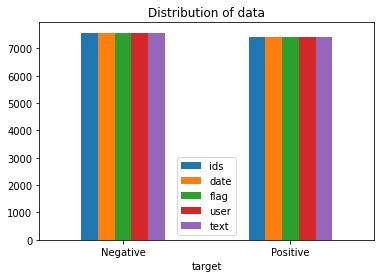

In [74]:
# plotting the distribution of dataset
ax=df.groupby('target').count().plot(kind='bar', title='Distribution of data')
ax.set_xticklabels(['Negative','Positive'],rotation=0)
# storing data in lists
text,sentiment=list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

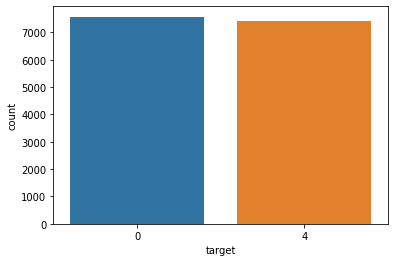

In [75]:
import seaborn as sns
sns.countplot(x='target', data=df)

---

### 5. Data preprocessing for better results

5.1 Convert into lower case for better generalization

5.2 Clean and remove URLs  and handles (@User) 

5.3 Remove stopwords

5.4 Clean and remove punctuations

5.5 Clean and remove numbers

5.6 Tokenization of tweet text

5.7 Perform Stemming(reducing the words to their derived stems)

5.8 Perform Normalization - Lemmatization (reducing the derived words to their root form known as lemma)

5.9 Seperate input feature and label

5.10 Plot clouds of words for postive tweets and negative tweets

5.11 Determining word density of the dataset

In [76]:
data = df.drop(['ids','date','flag','user'],axis=1) # selecting the text and target column for our further analysis

In [77]:
data['target'] = data['target'].replace(4,1) # replacing value 4 by value 1 for positive sentiment

In [78]:
data['target'].unique() #find out the unique values in target column of dataset data

array([0, 1])

In [79]:
data['target'].dtype #find out the data type of target column of dataset data

dtype('int64')

In [80]:
data.head()

,target,text
187806,0,This shit is gay I have no friends ..
76712,0,may the 4th be with you. hahaha so i went into...
235564,0,@fuzzypigz I have a guinea pig too! I don't e...
326555,0,Why did I ever start watching the OTTBs? I ju...
313021,0,@thisgoeshere hm.... I'm not sure. But in Mich...


#### 5.1 convert 'text' column to lower case for better generalization

In [81]:
data['text']=data['text'].str.lower()
data['text'].tail()

679632     @uyennguyen_ no! i wanted to  i was so upset t...
1520433    @keiizpasion haha! good luck! better start wor...
79935      tired....really dont want to go to work tomorr...
1537250    @diymarketers @stacijshelton i learn from good...
668052                        is leaving new york tomorroww 
Name: text, dtype: object

In [82]:
data['text'].head

<bound method NDFrame.head of 187806                this shit is gay i have no friends  ..
76712      may the 4th be with you. hahaha so i went into...
235564     @fuzzypigz i have a guinea pig too!  i don't e...
326555     why did i ever start watching the ottbs?  i ju...
313021     @thisgoeshere hm.... i'm not sure. but in mich...
                                 ...                        
679632     @uyennguyen_ no! i wanted to  i was so upset t...
1520433    @keiizpasion haha! good luck! better start wor...
79935      tired....really dont want to go to work tomorr...
1537250    @diymarketers @stacijshelton i learn from good...
668052                        is leaving new york tomorroww 
Name: text, Length: 15000, dtype: object>

#### 5.2 Clean and remove URLs and handles (@User)

In [83]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(http?://[^s]+)|(https?://[^s]+))','',data)
data['text']=data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

187806               this shit is gay i have no friends  ..
76712     may the 4th be with you. hahaha so i went into...
235564    @fuzzypigz i have a guinea pig too!  i don't e...
326555    why did i ever start watching the ottbs?  i ju...
313021    @thisgoeshere hm.... i'm not sure. but in mich...
Name: text, dtype: object

In [84]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
# remove twitter handles (@user)
data['text']=np.vectorize(remove_pattern)(data['text'],"@[\w]*")

In [85]:
data['text'].head()

187806               this shit is gay i have no friends  ..
76712     may the 4th be with you. hahaha so i went into...
235564     i have a guinea pig too!  i don't even eat hi...
326555    why did i ever start watching the ottbs?  i ju...
313021     hm.... i'm not sure. but in michigan it would...
Name: text, dtype: object

#### 5.3 remove stopwords

In [86]:
stopwords1=stopwords.words('english')
stopwords1[:3]

['i', 'me', 'my']

In [87]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords1])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

187806                                  shit gay friends ..
76712     may 4th you. hahaha went borders today came 3 ...
235564    guinea pig too! even eat him! get pic ruffles,...
326555    ever start watching ottbs? can't yet. somebody...
313021    hm.... i'm sure. michigan would 5am.... o.o co...
Name: text, dtype: object

#### 5.4 clean and remove punctuations


In [88]:
from string import punctuation

punctuations_list = punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))

data['text'].head()

187806                                    shit gay friends 
76712     may 4th you hahaha went borders today came 3 b...
235564    guinea pig too even eat him get pic ruffles br...
326555    ever start watching ottbs cant yet somebody ma...
313021    hm im sure michigan would 5am oo could probabl...
Name: text, dtype: object

In [89]:
data['text'].tail()

679632                 no wanted upset day it you
1520433     haha good luck better start workin it
79935      tiredreally dont want go work tomorrow
1537250                     learn goodgivers like
668052                 leaving new york tomorroww
Name: text, dtype: object

#### 5.5 Clean and remove numbers

In [90]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
data['text']=data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

187806                                    shit gay friends 
76712     may th you hahaha went borders today came  boo...
235564    guinea pig too even eat him get pic ruffles br...
326555    ever start watching ottbs cant yet somebody ma...
313021    hm im sure michigan would am oo could probably...
Name: text, dtype: object

In [91]:
data['text'].tail()

679632                 no wanted upset day it you
1520433     haha good luck better start workin it
79935      tiredreally dont want go work tomorrow
1537250                     learn goodgivers like
668052                 leaving new york tomorroww
Name: text, dtype: object

### 5.6 Tokenization of tweet text

In [92]:
from nltk.tokenize import TweetTokenizer

# Instantiate a tweet tokenizer that will preserve each word (or token) as it is
tweet_tokenizer = TweetTokenizer(
    preserve_case = True,
    reduce_len    = False,
    strip_handles = False)

tweets=data['text']

tokens = [tweet_tokenizer.tokenize(t) for t in tweets]

print("Example of a tweet:\n{}\n".format(tweets[0]))
print("Tokens:\n{}".format(tokens[0]))

KeyError: 0

In [ ]:
data['text'] = tokens

In [ ]:
data['text'].head()

0    [bummer, shoulda, got, david, carr, third, day...
1    [upset, cant, update, facebook, texting, it, m...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4    [no, behaving, all, im, mad, here, cant, see, ...
Name: text, dtype: object

#### 5.7 Apply Stemming

In [ ]:
from nltk.stem import SnowballStemmer
import nltk
st = nltk.SnowballStemmer('english')
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0    [bummer, shoulda, got, david, carr, third, day...
1    [upset, cant, updat, facebook, text, it, might...
2    [dive, mani, time, ball, manag, save, rest, go...
3               [whole, bodi, feel, itchi, like, fire]
4    [no, behav, all, im, mad, here, cant, see, there]
Name: text, dtype: object

#### 5.8 Apply Lemmatizer

In [ ]:
from nltk.tag import pos_tag    # Part-of-speech tagger

tags = [pos_tag(t) for t in data['text']]

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

# All we need is to know the type (Noun, Verb, or others) of each word
def _tag2type(tag):
    '''
    Take a tag and return a type.
    return 'n' for noun, 'v' for verb, and 'a' for any
    '''
    if tag.startswith('NN'):
        return 'n'
    elif tag.startswith('VB'):
        return 'v'
    else:
        return 'a'

lemmatizer = WordNetLemmatizer()
data['text']= [[lemmatizer.lemmatize(word, _tag2type(tag)) for (word, tag) in t] for t in tags]
data['text'].head()

0    [bummer, shoulda, get, david, carr, third, day...
1    [upset, cant, updat, facebook, text, it, might...
2    [dive, mani, time, ball, manag, save, rest, go...
3               [whole, bodi, feel, itchi, like, fire]
4    [no, behav, all, im, mad, here, cant, see, there]
Name: text, dtype: object

In [ ]:
data['text'].tail()

1599995                 [wake, up, school, best, feel, ever]
1599996    [thewdbcom, cool, hear, old, walt, interview, ...
1599997                   [readi, mojo, makeov, ask, detail]
1599998    [happi, th, birthday, boo, alll, time, tupac, ...
1599999                              [happi, charitytuesday]
Name: text, dtype: object

#### 5.9 Seperate input feature and label

In [ ]:
X=data.text
y=data.target

In [ ]:
type(X)

pandas.core.series.Series

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
# seperating data dataset into positive and negative dataframes

data_pos=data[data['target']==1]
data_neg=data[data['target']==0]

In [ ]:
data_neg

,target,text
0,0,"[bummer, shoulda, get, david, carr, third, day..."
1,0,"[upset, cant, updat, facebook, text, it, might..."
2,0,"[dive, mani, time, ball, manag, save, rest, go..."
3,0,"[whole, bodi, feel, itchi, like, fire]"
4,0,"[no, behav, all, im, mad, here, cant, see, there]"
...,...,...
799995,0,"[sick, spend, day, lay, bed, listen]"
799996,0,"[gmail, down]"
799997,0,"[rest, peac, farrah, sad]"
799998,0,"[sound, like, rival, flag, ad, much, though]"


In [ ]:
pos_tweets=data_pos['text'].values

In [ ]:
neg_tweets=data_neg['text'].values

#### 5.10 Plot clouds of words for postive tweets and negative tweets

Text(0.5, 1.0, 'Word Cloud for Negative tweets')

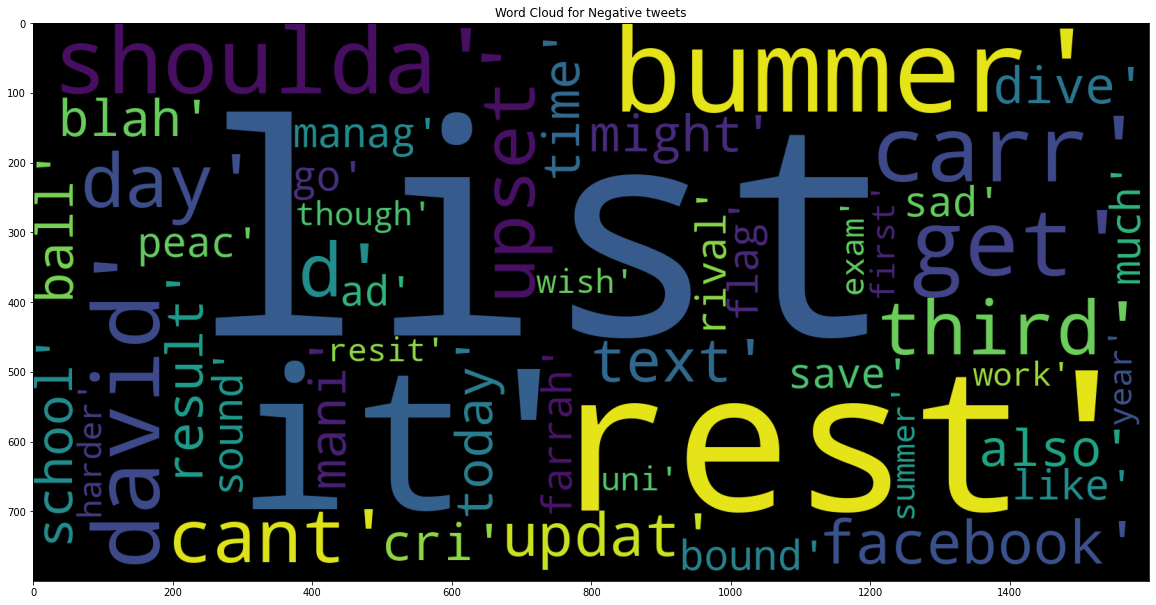

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(str(neg_tweets))
plt.imshow(wc)
plt.title('Word Cloud for Negative tweets')


Text(0.5, 1.0, 'Word Cloud for Positive tweets')

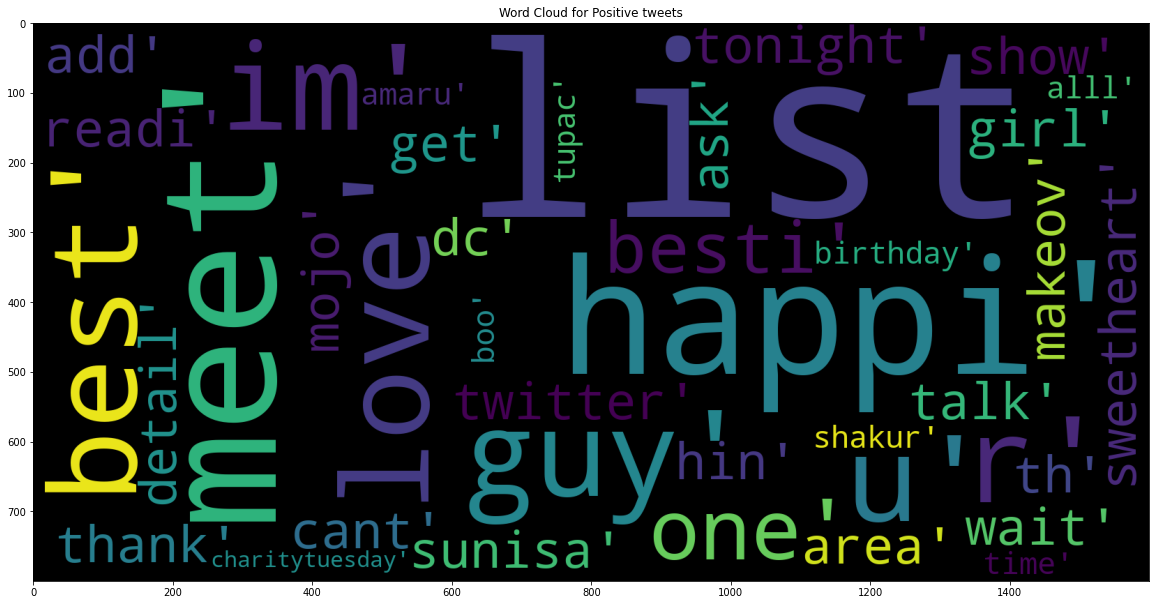

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(str(pos_tweets))
plt.imshow(wc)
plt.title('Word Cloud for Positive tweets')

#### 5.11 Determining word density of the dataset

In [ ]:
from nltk import FreqDist

def get_all_words(tokens_list):
    '''
    Generator function to get a flat mapping of all words in the dataset.
    
    @arg tokens_list: A 2-D list of (preferably cleaned) tokens
    @return A list of all words
    '''
    for tokens in tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(pos_tweets)
all_neg_words = get_all_words(neg_tweets)

freq_dist_pos = FreqDist(all_pos_words)
freq_dist_neg = FreqDist(all_neg_words)

print("The 10 most common words in a set of positive tweets:\n{}\n".format(freq_dist_pos.most_common(10)))
print("The 10 most common words in a set of negative tweets:\n{}".format(freq_dist_neg.most_common(10)))

The 10 most common words in a set of positive tweets:
[('get', 76108), ('im', 74436), ('good', 73204), ('go', 65369), ('love', 58765), ('day', 53793), ('thank', 49147), ('like', 39783), ('lol', 33400), ('time', 33299)]

The 10 most common words in a set of negative tweets:
[('im', 101991), ('get', 94068), ('go', 92598), ('work', 57252), ('day', 49959), ('miss', 46693), ('cant', 43364), ('like', 42726), ('want', 39850), ('good', 39208)]


---

### 6. Splitting the data into train and test subsets

In [ ]:
# Separating the 90% data for training data and 10% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =50)

---

### 7.  Transforming Dataset using TF-IDF Vectorizer
#### 7.1: Fit the TF-IDF Vectorizer

In [52]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/Users/naickercreason/dev/Final_Project_KCD/twitter/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


#### 7.2 Transform the data using TF-IDF Vectorizer

In [53]:
X_train = vectoriser.transform(X_train.apply(lambda x: ' '.join(x)))
X_test  = vectoriser.transform(X_test.apply(lambda x: ' '.join(x)))

---

### 8. Model Evaluation

After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

- Accuracy Score
- Confusion Matrix with Plot
- ROC-AUC Curve

In [54]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

---

### 9 Model Building

Following classifiers are evaluated to see which one gives the best performance:

9.1 Bernoulli Naive Bayes

9.2 SVM (Support Vector Machine)

9.3 Logistic Regression

9.4 XGBoost


#### 9.1: Model-1 Bernoulli Naive Bayes

#### 9.2 Model-2 SVM (Support Vector Machine)

#### 9.3 Model-3 Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     80139
           1       0.78      0.81      0.79     79861

    accuracy                           0.79    160000
   macro avg       0.79      0.79      0.79    160000
weighted avg       0.79      0.79      0.79    160000



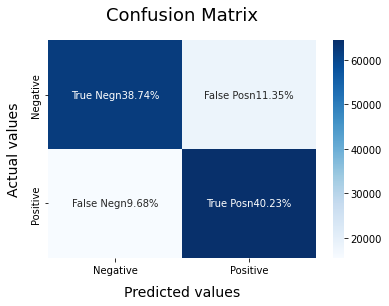

In [55]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [56]:
# import pickle

# pickle_out = open("LRmodel.pickle","wb")
# pickle.dump(LRmodel, pickle_out)
# pickle_out.close()

#### 9.4 Model-4 XGBoost

---
### 10. Conclusion

In [57]:
print(type(X_test))

<class 'scipy.sparse.csr.csr_matrix'>


As per above section 9 evaluations, we can conclude the following:

**Accuracy:** In accuracy, Logistic Regression (Model-3: 0.79) performs better than Support Vector Machine (Model-2: 0.78), Bernoulli Naive Bayes (Model-1: 0.77) and XG Boost (Model-4: 0.74).

**F1-score:** The F1 Scores for class 0 and class 1 are :
(a) For class 0: XGBoost (accuracy=0.71) < Bernoulli Naive Bayes(accuracy = 0.77) < SVM (accuracy =0.78) < Logistic Regression (accuracy = 0.79)
(b) For class 1: XGBoost (accuracy=0.76) < Bernoulli Naive Bayes (accuracy = 0.78) = SVM (accuracy = 0.78) < Logistic Regression (accuracy = 0.79)

**AUC Score:** In ROC-AUC score, Logistic Regression (Model-3: 0.79) performs better than Support Vector Machine (Model-2: 0.78), Bernoulli Naive Bayes (Model-1: 0.78) and XGBoost (Model-4: 0.74)

##### We, therefore, conclude that the **Logistic Regression** is the best model for the Sentiment140 dataset.